In [27]:
import librosa
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import IPython
import IPython.display as ipd  # To play sound in the notebook

In [28]:
SAMPLE_RATE = 44100
train = pd.read_csv('../input/train.csv')
train.head()

fname         label  manually_verified
0  00044347.wav        Hi-hat                  0
1  001ca53d.wav     Saxophone                  1
2  002d256b.wav       Trumpet                  0
3  0033e230.wav  Glockenspiel                  1
4  00353774.wav         Cello                  1

In [58]:
wav, sampling_rate = librosa.core.load('../input/audio_train/'+train.fname[0], sr=16000)
IPython.display.display(ipd.Audio('../input/audio_train/'+train.fname[0]))

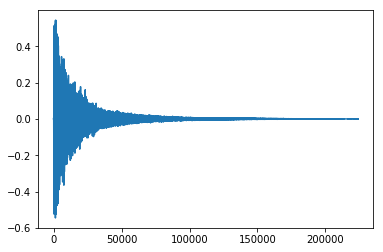

In [30]:
plt.plot(wav, '-', )

In [31]:
sampling_rate

16000

In [43]:
#pitch shift
bpo = 24 #how many steps per octave
pr = 1 #pitch shift range
ps = int(np.random.uniform(-pr * bpo, pr * bpo) + 0.5) #how many (fractional) half-steps to shift y
shifted_wav = librosa.effects.pitch_shift(wav, sampling_rate, n_steps = ps, bins_per_octave = bpo)
librosa.output.write_wav('../temp/temp.wav', shifted_wav, sampling_rate)
IPython.display.display(ipd.Audio( '../temp/temp.wav'))

In [51]:
#time stretch
tr = 2.0 #speed up/down rate
lgtr = np.log(tr)
ts = 2 ** np.random.uniform(-lgtr,lgtr)
shifted_wav = librosa.effects.time_stretch(wav, ts)
librosa.output.write_wav('../temp/temp.wav', shifted_wav, sampling_rate)
IPython.display.display(ipd.Audio( '../temp/temp.wav'))

In [65]:
#white noise
wnvr = 10 #white noise level
wnv = np.random.uniform(0,wnvr)
shifted_wav = wav + np.random.uniform(-wnv,wnv,wav.shape)
librosa.output.write_wav('../temp/temp.wav', shifted_wav, sampling_rate)
IPython.display.display(ipd.Audio( '../temp/temp.wav'))